<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [12]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")
# @doc Pas_De_Cauchy

Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [13]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_pas_de_Cauchy.jl")
include("../src/Pas_De_Cauchy.jl")

affiche = false

@testset "Test algo pas de Cauchy" begin
	# Tester l'algorithme de Newton
	tester_pas_de_Cauchy(affiche,Pas_De_Cauchy)
end;

Test Summary:           | Pass  Total  Time
Test algo pas de Cauchy |   12     12  2.6s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [14]:
include("Regions_De_Confiance.jl")
# @doc Regions_De_Confiance

Regions_De_Confiance

4. Vérifier que les tests ci-dessous passent.

In [15]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

iters = 864
avec GCT 

: Error During Test at /home/romai/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_regions_de_confiance.jl:92


  Got exception outside of a @test
  UndefVarError: Gradient_Conjugue_Tronque not defined
  Stacktrace:
    [1] Regions_De_Confiance(algo::String, f::typeof(fct1), gradf::typeof(grad_fct1), hessf::typeof(hess_fct1), x0::Vector{Int64}, options::Vector{Float64})
      @ Main ~/Enseeiht/S7/Opti/peyremorte_romain_m2/src/Regions_De_Confiance.jl:101
    [2] macro expansion
      @ ~/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_regions_de_confiance.jl:94 [inlined]
    [3] macro expansion
      @ /julia-1.8.2/share/julia/stdlib/v1.8/Test/src/Test.jl:1357 [inlined]
    [4] macro expansion
      @ ~/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_regions_de_confiance.jl:94 [inlined]
    [5] macro expansion
      @ /julia-1.8.2/share/julia/stdlib/v1.8/Test/src/Test.jl:1357 [inlined]
    [6] tester_regions_de_confiance(afficher::Bool, Regions_De_Confiance::typeof(Regions_De_Confiance))
      @ Main ~/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_regions_de_confiance.jl:40
    [7] macro 

TestSetException: Some tests did not pass: 15 passed, 0 failed, 1 errored, 0 broken.

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

Le modèle de Taylor à l'ordre 2 est :

$$f(x_1+s_1,x_2+s_2, x_3+s_3) = 3x_1^2+4x_2^2+3x_3^2+2x_1x_2+4x_1x_3+2x_2x_3-12(x_1+x_2+x_3) + 6x_1s_1+2x_2s_1+4x_3s_1+2x_1s_2+8x_2s_2+2x_3s_2+4x_1s_3+2x_2s_3+6x_3s_3-12(s_1+s_2+s_3)$$


In [16]:
include("../test/fonctions_de_tests.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0_1 = 2
delta0_2 = 2
options1 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
# Tests Algorithme_De_Newton
println("\nAlgorithme de Newton\n")
_, _, flag, nb_iters = Algorithme_De_Newton(fct1,grad_fct1,hess_fct1,[454204;-2545;120145],[])
println("\nTest 1 : flag ",flag," nb_iters ",nb_iters)
_, _, flag, nb_iters = Algorithme_De_Newton(fct1,grad_fct1,hess_fct1,[45;-25;12],[])
println("\nTest 2 : flag ",flag," nb_iters ",nb_iters)
_, _, flag, nb_iters = Algorithme_De_Newton(fct1,grad_fct1,hess_fct1,[0;1;1],[])
println("\nTest 3 : flag ",flag," nb_iters ",nb_iters)
# Tests Pas de Cauchy
println("\nPas de Cauchy\n")
_,_, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,[454204;-2545;120145],options1)
println("\nTest 1 : flag ",flag12," nb_iters ",nb_iters12)
_,_, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,[45;-25;12],options1)
println("\nTest 2 : flag ",flag12," nb_iters ",nb_iters12)
_,_, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,[0;1;1],options1)
println("\nTest 3 : flag ",flag12," nb_iters ",nb_iters12)



Algorithme de Newton




Test 1 : flag 0 nb_iters 1

Test 2 : flag 0 nb_iters 1

Test 3 : flag 0 nb_iters 1

Pas de Cauchy


Test 1 : flag 

3 nb_iters 5000

Test 2 : flag 2 nb_iters 39

Test 3 : flag 2 nb_iters 26


Avec différents points initiaux, on remarque que l'algorithme de Newton converge toujours à la première itération tandis que RC-Pas de Cauchy se termine soit par stagnation de la fonction, soit car le nombre d'itération est dépassé. On peut donc remarquer que l'algorithme de Newton est plus efficace que la méthode RC-Pas de Cauchy.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

In [17]:
using Pkg;
Pkg.add("Plots"); 
using Plots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [18]:
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 1000

delta0_1 = 2


variationEta1 = 0.3:0.2:1.3 #0.3:0.1:0.9
variationEta2 = 0.1:0.2:1.1 #0.1:0.1:0.7
variationGamma1 = 0.1:0.1:0.9
variationGamma2 = 1.1:.1:1.9
size = max(length(variationEta1),length(variationEta2),length(variationGamma1),length(variationGamma2))
iterationsEta1 = []
iterationsEta2 = []
iterationsGamma1 = []
iterationsGamma2 = []

for i in 1:size
    if i <= length(variationEta1)
        options =[deltaMax,gamma1,gamma2,variationEta1[i],variationEta1[i]+0.1,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
        _,_, flag, nb_iters  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options)
        push!(iterationsEta1, nb_iters)
    end
    if i <= length(variationEta2)
        options =[deltaMax,gamma1,gamma2,eta1,variationEta2[i],delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
        _,_, flag, nb_iters  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options)
        push!(iterationsEta2, nb_iters)
    end
    if i <= length(variationGamma1)
        options =[deltaMax,variationGamma1[i],gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
        _,_, flag, nb_iters  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options)
        push!(iterationsGamma1, nb_iters)
    end
    if i <= length(variationGamma2)
        options =[deltaMax,gamma1,variationGamma2[i],eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
        _,_, flag, nb_iters  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options)
        push!(iterationsGamma2, nb_iters)
    end
end



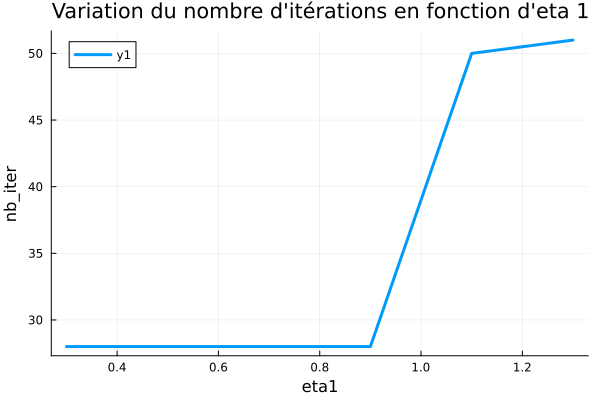

In [19]:
plot(variationEta1, iterationsEta1, title="Variation du nombre d'itérations en fonction d'eta 1", xlabel="eta1", ylabel = "nb_iter", linewidth=3)


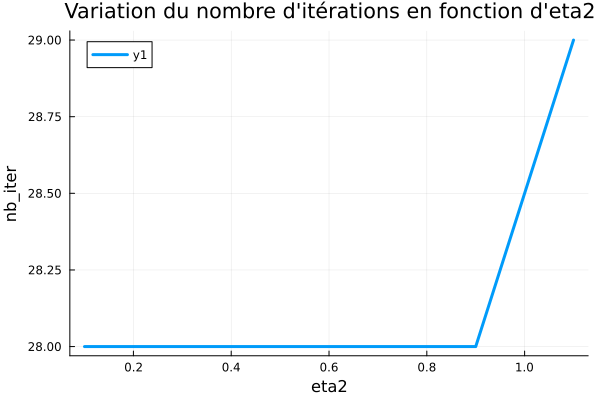

In [20]:
plot(variationEta2, iterationsEta2,title="Variation du nombre d'itérations en fonction d'eta2", xlabel="eta2", ylabel = "nb_iter", linewidth=3)

On remarque que le fait d'augmenter les $\eta$ fait augmenter le nombre d'itérations lorsque ces derniers dépassent 1. Entre 0 et 1, on ne remarque aucun changement sur la performance du programme.

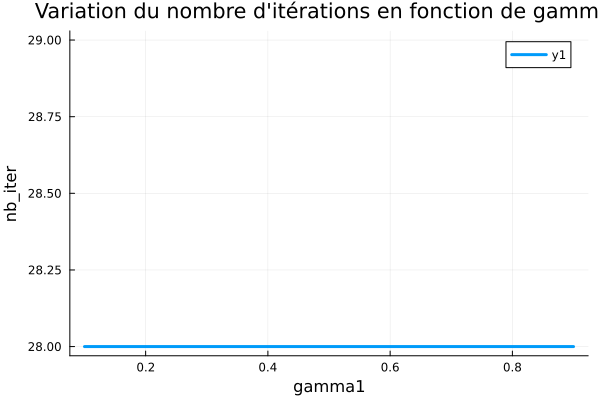

In [21]:
plot(variationGamma1, iterationsGamma1,title="Variation du nombre d'itérations en fonction de gamma1", xlabel="gamma1", ylabel = "nb_iter", linewidth=3)

Sur sa plage de variation, $[0;1]$, $\gamma_1$ ne fait pas varier la performance de l'algorithme.

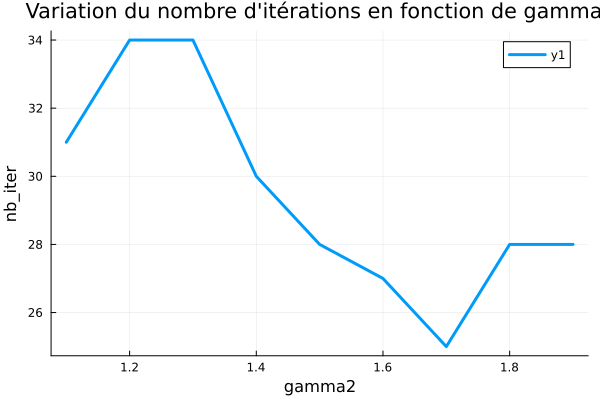

In [22]:
plot(variationGamma2, iterationsGamma2,title="Variation du nombre d'itérations en fonction de gamma2", xlabel="gamma2", ylabel = "nb_iter", linewidth=3)

On peut observer que l'augmentation de $\gamma_2$ entraine une baisse du nombre d'itération jusqu'à un certain point ($\gamma_1=1.7$ sur la courbe) où cela remonte et stagne. On peut donc déduire qu'augmenter $\gamma_1$ augmente les performances.

# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [23]:
include("Gradient_Conjugue_Tronque.jl")
# @doc Gradient_Conjugue_Tronque

Gradient_Conjugue_Tronque

2. Vérifier que les tests ci-dessous passent.

In [9]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = false

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

LoadError: LoadError: UndefVarError: @doc_str not defined
in expression starting at /home/romai/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_gct.jl:1
in expression starting at /home/romai/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_gct.jl:1

3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [10]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = false

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

LoadError: LoadError: UndefVarError: @doc_str not defined
in expression starting at /home/romai/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_regions_de_confiance.jl:1
in expression starting at /home/romai/Enseeiht/S7/Opti/peyremorte_romain_m2/test/tester_regions_de_confiance.jl:1

## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 
    1. Que remarquez vous ?
    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

3. Quels sont les avantages et inconvénients des deux approches ?

In [11]:
# La tolérance utilisée dans les tests
tol_erreur = 1e-2
# initialisation des variables de l'algorithme
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 10
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 1
delta0_1 = 2
delta0_2 = 2
options1 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
options2 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_2,maxits,Tol_abs,Tol_rel,epsilon]
x_min11c, fmin11c, _, _ = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
println("\nCas 1, f après une itération : ",fmin11c)
x_min11g, fmin11g, _, _= Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
println("\nCas 1, f après une itération : ",fmin11g)

UndefVarError: UndefVarError: Regions_De_Confiance not defined

Avec une itération, on remarque que les deux méthodes obtiennent la même décroissance. Cependant avec plus d'itérations, on remarque que la méthode du gradient est plus précise mais moins rapide : la décroissance est plus importante pour Cauchy mais et on obtient plus difficielement un résultat proche de ce qui est attendu.

La méthode du gradient conjugué tronqué permet d'obtenir un résultat plus proche de la solution, cependant, le nombre d'itérations est beaucoup plus important, donc demande plus de temps de calcul.